In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from utils import Optimizer

In [ ]:
# optimizer_dir = Path('simulation_results/2025-06-02_19-48-08') # High infra costs
# optimizer_dir = Path('simulation_results/2025-06-02_19-48-52') # High wait time cost
# optimizer_dir = Path('simulation_results/2025-06-02_19-51-12') # High customer revenue
optimizer_dir = Path('simulation_results/2025-06-02_20-15-13') # High customer revenue, gaussian lambda

optimizer = Optimizer.from_dir(optimizer_dir)
simulation_df = optimizer.get_sim('best')
for col_name, dtype in simulation_df.dtypes.items():
    print(f"{col_name}: {dtype}")

time: float64
queue_size_distribuition: object
producer_lambda: float64
producer_lambda_hat: float64
effective_producer_lambda: float64
consumer_lambda: float64
profit: float64
cost: float64
revenue: float64
reject_prob: float64
integrated_profit: float64
integrated_revenue: float64
integrated_cost: float64
expected_queue_size: float64
expected_wait_time: float64


In [3]:
def add_hyperparameters(ax):
    lines = ax.plot([], [], ' ', label=f'Optimal gain = {optimizer.result['x']:.2f}')
    lines += ax.plot([], [], ' ', label=f'Profit = {-optimizer.result['fun']:.2f}')
    lines += ax.plot([], [], ' ', label=f'Initial gain = {optimizer.initial_controller_gain:.2f}')
    lines += ax.plot([], [], ' ', label=f'Queue Size = {optimizer.queue_size}')
    lines += ax.plot([], [], ' ', label=f'Infra Cost = {optimizer.infra_cost:.2f}')
    lines += ax.plot([], [], ' ', label=f'Wait Time Cost = {optimizer.wait_time_cost:.2f}')
    lines += ax.plot([], [], ' ', label=f'Customer Revenue = {optimizer.customer_revenue:.2f}')
    lines += ax.plot([], [], ' ', label=f'Seconds = {optimizer.seconds:.2f}')
    return lines

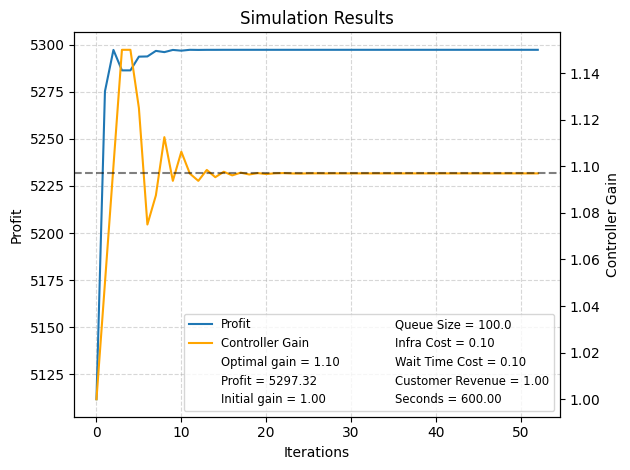

In [4]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)
lines = ax.plot(-optimizer.costs, label='Profit')
twinx = ax.twinx()
lines += twinx.plot(optimizer.controller_gain, label='Controller Gain', color='orange')
twinx.axhline(optimizer.result['x'], linestyle='--', color='k', alpha=.5)
ax.set(
    title='Simulation Results',
    xlabel='Iterations',
    ylabel='Profit',
)
twinx.set_ylabel('Controller Gain')
lines += add_hyperparameters(ax)
ax.legend(lines, [line.get_label() for line in lines],
          ncol=2, fontsize='small')
fig.tight_layout()
fig.savefig(optimizer_dir / 'simulation_progression.png', dpi=300)

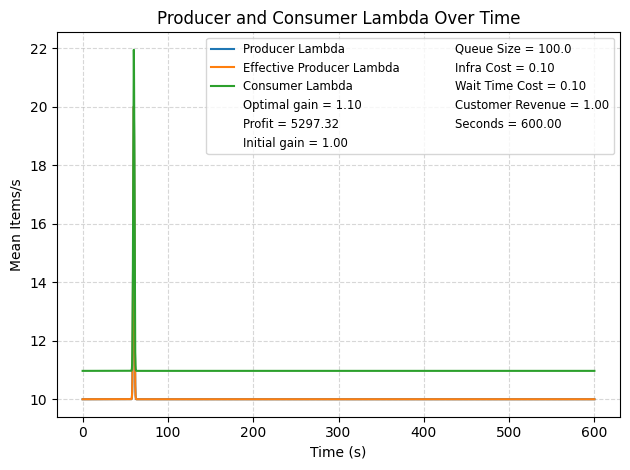

In [5]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
ax.plot(simulation_df['time'], simulation_df['producer_lambda'], label='Producer Lambda')
ax.plot(simulation_df['time'], simulation_df['effective_producer_lambda'], label='Effective Producer Lambda')
ax.plot(simulation_df['time'], simulation_df['consumer_lambda'], label='Consumer Lambda')
add_hyperparameters(ax)
ax.legend(fontsize='small', ncol=2)
ax.set(
    xlabel='Time (s)',
    ylabel='Mean Items/s',
    title='Producer and Consumer Lambda Over Time'
)
fig.tight_layout()
fig.savefig(optimizer_dir / 'producer_consumer_lambda.png', dpi=300)

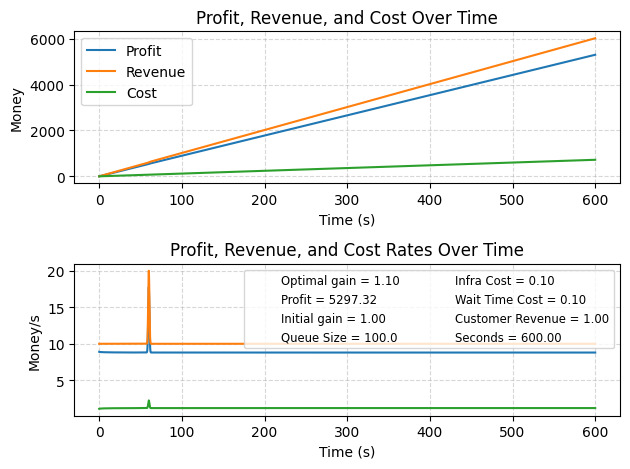

In [6]:
fig, ax = plt.subplots(2, 1)
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax[0].grid(linestyle='--', alpha=.5)
ax[0].plot(simulation_df['time'], simulation_df['integrated_profit'], label='Profit')
ax[0].plot(simulation_df['time'], simulation_df['integrated_revenue'], label='Revenue')
ax[0].plot(simulation_df['time'], simulation_df['integrated_cost'], label='Cost')
ax[0].legend()
ax[0].set(
    xlabel='Time (s)',
    ylabel='Money',
    title='Profit, Revenue, and Cost Over Time'
)
ax[1].grid(linestyle='--', alpha=.5)
ax[1].plot(simulation_df['time'], simulation_df['profit'])
ax[1].plot(simulation_df['time'], simulation_df['revenue'])
ax[1].plot(simulation_df['time'], simulation_df['cost'])
ax[1].set(ylabel='Money/s',
          xlabel='Time (s)',
          title='Profit, Revenue, and Cost Rates Over Time')
add_hyperparameters(ax[1])
ax[1].legend(fontsize='small', ncol=2)
fig.tight_layout()
fig.savefig(optimizer_dir / 'money_over_time.png', dpi=300)

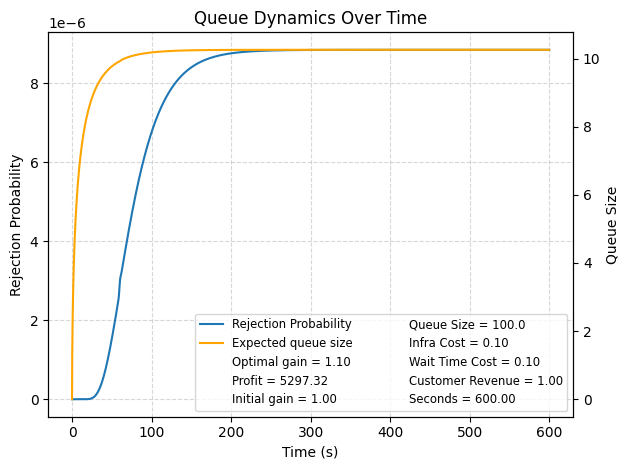

In [7]:
from numpy import add


fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
lines = ax.plot(simulation_df['time'], simulation_df['reject_prob'], label='Rejection Probability')
ax.set(
    xlabel='Time (s)',
    ylabel='Rejection Probability',
    title='Queue Dynamics Over Time'
)
twinx = ax.twinx()
lines += twinx.plot(simulation_df['time'], simulation_df['expected_queue_size'], label='Expected queue size', color='orange')
lines += add_hyperparameters(ax)
twinx.set_ylabel('Queue Size')
ax.legend(lines, [line.get_label() for line in lines], loc='lower right',
          ncol=2, fontsize='small')
fig.tight_layout()
fig.savefig(optimizer_dir / 'queue_dynamics.png', dpi=300)